In [19]:
import requests
import pandas as pd

# PL
api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
url = 'https://api.football-data.org/v4/competitions/BL1/standings'
headers = {'X-Auth-Token': api_token}

# Parameters to select matchday and seasone
params = {
    'season': '2021',
    'matchday': '1'  
}


response = requests.get(url, headers=headers, params=params)


if response.status_code == 200:
    data = response.json()

    
    if 'standings' in data:
       
        all_standings = []
        for standing_type in data['standings']:  
            for entry in standing_type['table']:
                team_info = entry['team']
                all_standings.append({
                    'position': entry['position'],
                    'team_id': team_info['id'],
                    'team_name': team_info['name'],
                    'playedGames': entry['playedGames'],
                    'form': entry['form'],
                    'won': entry['won'],
                    'draw': entry['draw'],
                    'lost': entry['lost'],
                    'points': entry['points'],
                    'goalsFor': entry['goalsFor'],
                    'goalsAgainst': entry['goalsAgainst'],
                    'goalDifference': entry['goalDifference']
                })

        
        standings_df = pd.DataFrame(all_standings)

        
        standings_df.to_csv('BL1', index=False)
        print("Data saved to 'PL_2021_standings.csv'.")
    else:
        print("No 'standings' key found in the JSON response.")
else:
    print("Failed to retrieve data: ", response.status_code)


Data saved to 'PL_2021_standings.csv'.


Data saved to 'PL_2021_standings_all_matchdays.csv'.


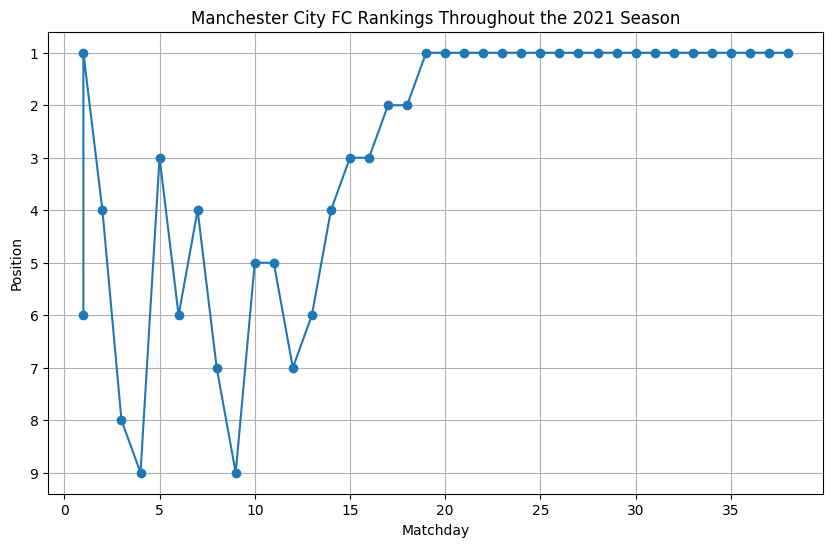

In [15]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# API token and URL setup
api_token = 'f979014853134c63bab59fba59b659cd'
url = 'https://api.football-data.org/v4/competitions/PL/standings'
headers = {'X-Auth-Token': api_token}

# Parameters to select the season
season = '2020'
total_matchdays = 38  # Total matchdays

# List to store all standings data
all_standings = []

# Loop through each matchday
for matchday in range(1, total_matchdays + 1):
    params = {
        'season': season,
        'matchday': str(matchday)  # Ensure matchday is a string for the parameter
    }
    
    # Making the request with the specified parameters
    response = requests.get(url, headers=headers, params=params)
    
    # Check if the response was successful
    if response.status_code == 200:
        data = response.json()
        
        # Check if the 'standings' data is available
        if 'standings' in data:
            for standing_type in data['standings']:  
                if standing_type['stage'] == 'REGULAR_SEASON':  
                    for entry in standing_type['table']:
                        
                        if entry['playedGames'] == matchday:
                            team_info = entry['team']
                            all_standings.append({
                                'matchday': matchday,
                                'position': entry['position'],
                                'team_id': team_info['id'],
                                'team_name': team_info['name'],
                                'playedGames': entry['playedGames'],
                                'form': entry['form'],
                                'won': entry['won'],
                                'draw': entry['draw'],
                                'lost': entry['lost'],
                                'points': entry['points'],
                                'goalsFor': entry['goalsFor'],
                                'goalsAgainst': entry['goalsAgainst'],
                                'goalDifference': entry['goalDifference']
                            })
        
        time.sleep(10)  
    else:
        print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
        
        if response.status_code == 429:
            time.sleep(10)  

# Convert list of dictionaries to DataFrame
standings_df = pd.DataFrame(all_standings)

# Save the DataFrame to a CSV file
standings_df.to_csv('PL_2021_standings.csv', index=False)
print("Data saved to 'PL_2021_standings_all_matchdays.csv'.")

# Plotting the time series graph 
team_name = 'Manchester City FC'  
team_data = standings_df[standings_df['team_name'] == team_name]

plt.figure(figsize=(10, 6))
plt.plot(team_data['matchday'], team_data['position'], marker='o')
plt.gca().invert_yaxis()  # Invert y-axis to show 1 at the top
plt.title(f"{team_name} Rankings Throughout the 2021 Season")
plt.xlabel("Matchday")
plt.ylabel("Position")
plt.grid(True)
plt.show()


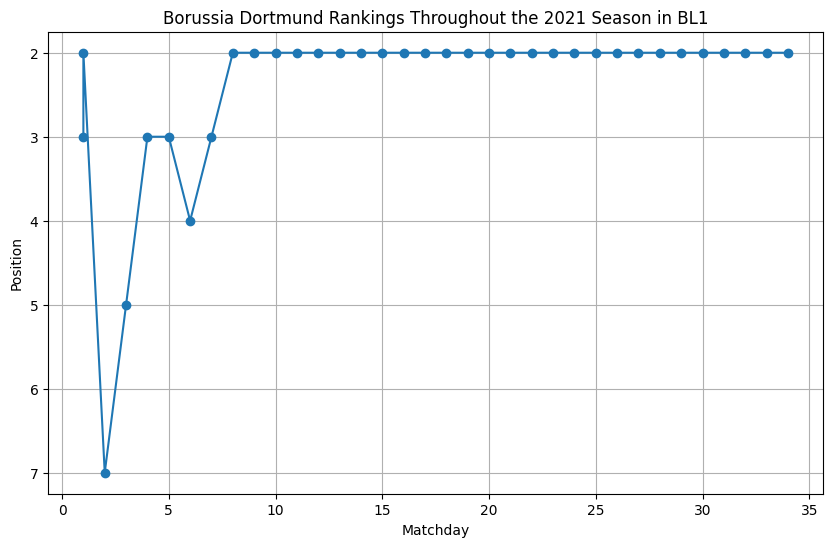

In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time

# API token and URL setup
api_token = 'fe99bf7a91b04b59948cda6eeef8e12c'
headers = {'X-Auth-Token': api_token}

# Parameters to select the season and league
season = '2021'
league_code = 'BL1'  


if league_code in ['PD', 'PL', 'SA']:
    total_matchdays = 38
elif league_code in ['BL1', 'FL1']:
    total_matchdays = 34
else:
    raise ValueError("Unsupported league code")

# Base URL for the API
base_url = 'https://api.football-data.org/v4/competitions'

# List to store all standings data
all_standings = []

# Loop through each matchday
for matchday in range(1, total_matchdays + 1):
    url = f'{base_url}/{league_code}/standings'
    params = {
        'season': season,
        'matchday': str(matchday)  # Ensure matchday is a string for the parameter
    }
    
    # Making the request with the specified parameters
    response = requests.get(url, headers=headers, params=params)
    
    
    if response.status_code == 200:
        data = response.json()
        
        # Check if the 'standings' data is available
        if 'standings' in data:
            for standing_type in data['standings']:  
                if standing_type['stage'] == 'REGULAR_SEASON':  
                    for entry in standing_type['table']:
                        
                        if entry['playedGames'] == matchday:
                            team_info = entry['team']
                            all_standings.append({
                                'matchday': matchday,
                                'position': entry['position'],
                                'team_name': team_info['name'],
                                'playedGames': entry['playedGames'],
                            })
        else:
            print(f"No standings data found for matchday {matchday}")
        
        time.sleep(10)  
    else:
        print(f"Failed to retrieve data for matchday {matchday}: ", response.status_code)
        print(response.text)  # Print the response text for more details
        
        if response.status_code == 429:
            time.sleep(10)  


standings_df = pd.DataFrame(all_standings)

# Plotting the time series graph 
team_name = 'Borussia Dortmund' 
team_data = standings_df[standings_df['team_name'] == team_name]

if not team_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(team_data['matchday'], team_data['position'], marker='o')
    plt.gca().invert_yaxis()  # Invert y-axis to show 1 at the top
    plt.title(f"{team_name} Rankings Throughout the 2021 Season in {league_code}")
    plt.xlabel("Matchday")
    plt.ylabel("Position")
    plt.grid(True)
    plt.show()
else:
    print(f"No data found for team {team_name}")
